# Quantum Fourier Transform

In [4]:
from math import pi
from qiskit import QuantumCircuit

In [73]:
n = 3

def qft(qc):
    for i in range(n):
        qc.h(i)
        for k in range(1, n-i):
            qc.cp(2*pi / (2**(k+1)), i, i+k)

In [44]:
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer

In [81]:
# Encode the state 5
qc = QuantumCircuit(n)
qc.x(0)
qc.x(2)
qft(qc)
qc.save_statevector()
qc.draw()

┌───┐┌───┐                                      statevector 
q_0: ┤ X ├┤ H ├─■────────■────────────────────────────────░──────
     └───┘└───┘ │P(π/2)  │       ┌───┐                    ░      
q_1: ───────────■────────┼───────┤ H ├─■──────────────────░──────
     ┌───┐               │P(π/4) └───┘ │P(π/2) ┌───┐      ░      
q_2: ┤ X ├───────────────■─────────────■───────┤ H ├──────░──────
     └───┘                                     └───┘      ░

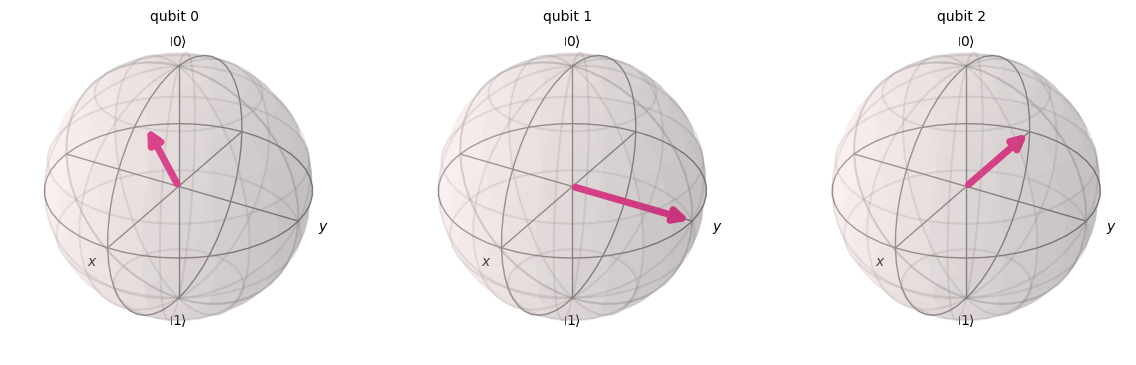

In [82]:
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)